In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df_train=pd.read_csv('data/allState/train.csv')
df_test=pd.read_csv('data/allState/test.csv')

In [4]:
df_train.shape

(188318, 132)

In [36]:
df_test.shape

(125546, 130)

In [5]:
ID=df_test.id
df_test.drop('id',axis=1, inplace=True)

In [6]:
# print all rows and all columns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
df_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [7]:
df_train.drop('id',axis=1, inplace=True)

In [8]:
data_cont=df_train.iloc[:,116:]
cols=data_cont.columns
cols

Index(['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8',
       'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss'],
      dtype='object')

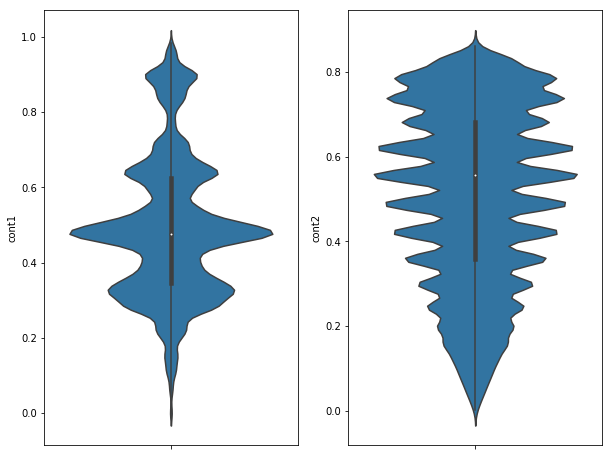

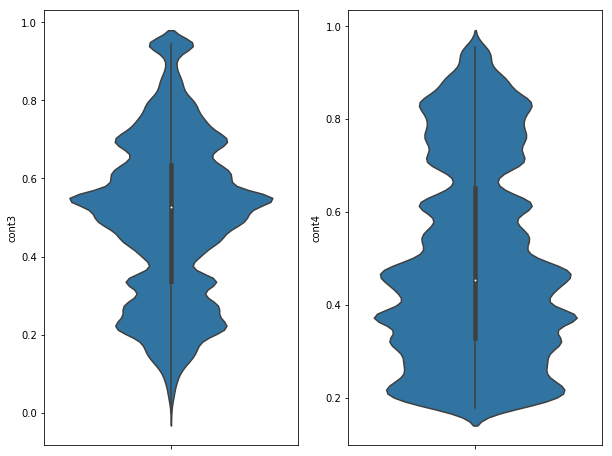

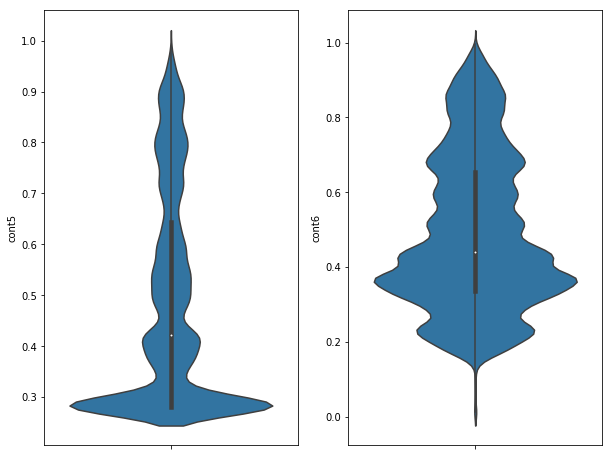

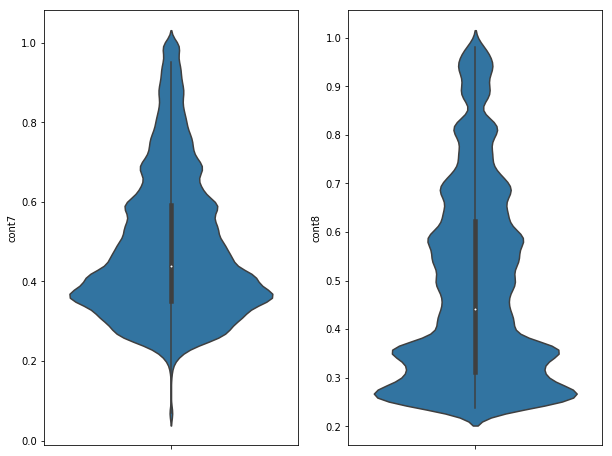

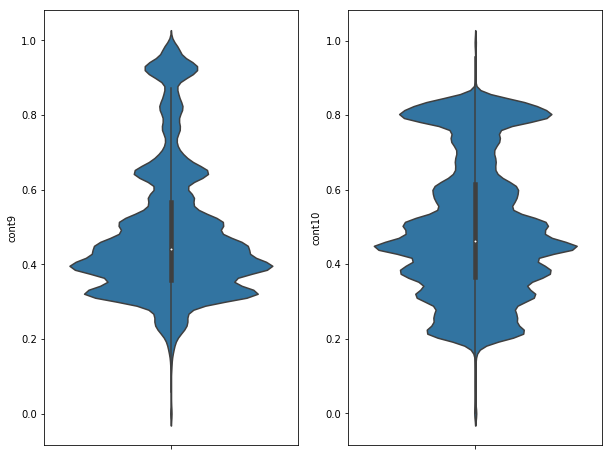

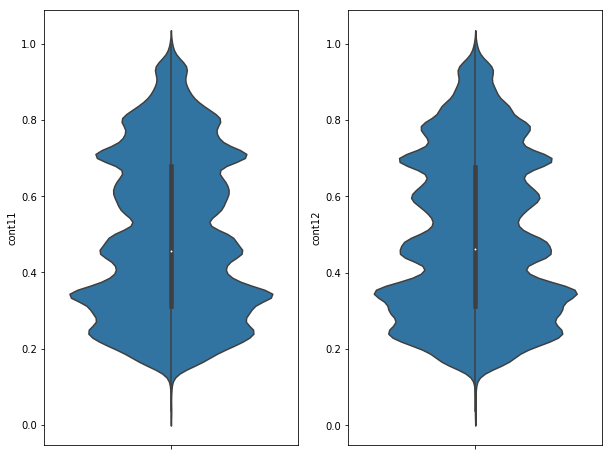

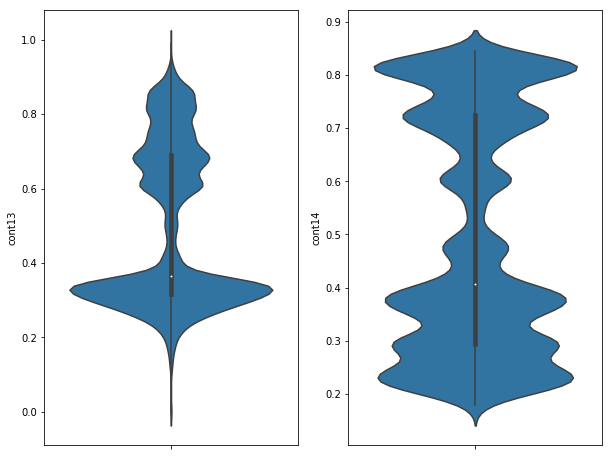

In [13]:
for i in range(7):
    f, axe=plt.subplots(1,2,figsize=(10,8))
    sns.violinplot(y=cols[2*i], data=data_cont, ax=axe[0])
    sns.violinplot(y=cols[2*i+1], data=data_cont, ax=axe[1])

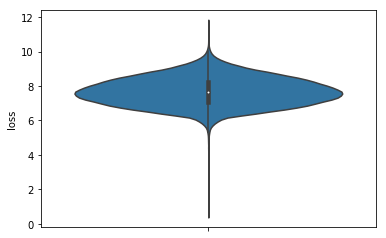

In [10]:
df_train.loss=np.log1p(df_train.loss)
sns.violinplot(y='loss',data=df_train)
plt.show()

In [11]:
data_corr=data_cont.corr()
type(data_corr)

pandas.core.frame.DataFrame

In [18]:
data_corr[data_corr>0.5]

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
cont1,1.000000,NaN,NaN,NaN,NaN,0.758315,NaN,NaN,0.929912,0.808551,0.596090,0.614225,0.534850,NaN,NaN
cont2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont3,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont4,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,0.52874,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont5,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont6,0.758315,NaN,NaN,NaN,NaN,1.000000,0.658918,NaN,0.797544,0.883351,0.773745,0.785144,0.815091,NaN,NaN
cont7,NaN,NaN,NaN,NaN,NaN,0.658918,1.000000,NaN,NaN,NaN,0.747108,0.742712,NaN,NaN,NaN
cont8,NaN,NaN,NaN,0.52874,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cont9,0.929912,NaN,NaN,NaN,NaN,0.797544,NaN,NaN,1.000000,0.785697,0.608000,0.626656,0.642028,NaN,NaN
cont10,0.808551,NaN,NaN,NaN,NaN,0.883351,NaN,NaN,0.785697,1.000000,0.702896,0.713812,0.707876,NaN,NaN


In [29]:
corr_list=[]
for i in range(0,15):
    for j in range(i+1, 15):
        if(data_corr.iloc[i,j]>=0.5 and data_corr.iloc[i,j]<1):
            corr_list.append([data_corr.iloc[i,j],i,j])

s_corr_list=sorted(corr_list, key=lambda x: -abs(x[0]))
for v, i, j in s_corr_list:
    print('%s and %s = %.2f' % (cols[i],cols[j],v))

cont11 and cont12 = 0.99
cont1 and cont9 = 0.93
cont6 and cont10 = 0.88
cont6 and cont13 = 0.82
cont1 and cont10 = 0.81
cont6 and cont9 = 0.80
cont9 and cont10 = 0.79
cont6 and cont12 = 0.79
cont6 and cont11 = 0.77
cont1 and cont6 = 0.76
cont7 and cont11 = 0.75
cont7 and cont12 = 0.74
cont10 and cont12 = 0.71
cont10 and cont13 = 0.71
cont10 and cont11 = 0.70
cont6 and cont7 = 0.66
cont9 and cont13 = 0.64
cont9 and cont12 = 0.63
cont1 and cont12 = 0.61
cont9 and cont11 = 0.61
cont1 and cont11 = 0.60
cont1 and cont13 = 0.53
cont4 and cont8 = 0.53


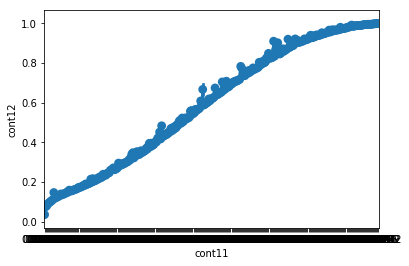

In [30]:
sns.pointplot('cont11','cont12',data=data_cont)

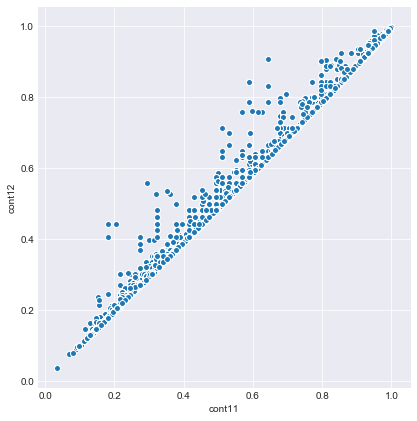

In [34]:
sns.set_style('darkgrid')
sns.pairplot(data_cont, size=6, x_vars='cont11',y_vars='cont12')

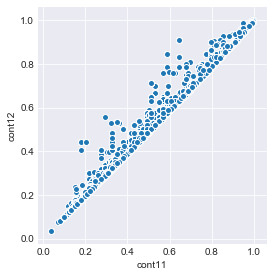

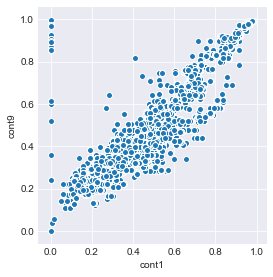

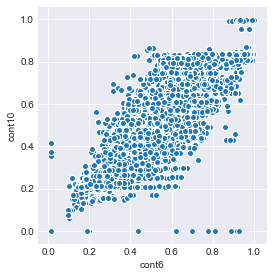

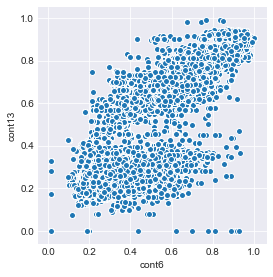

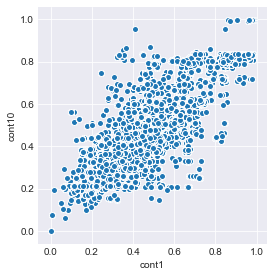

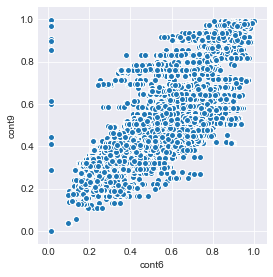

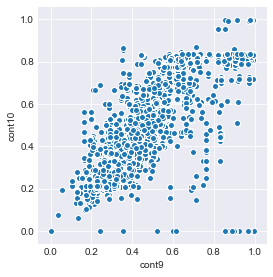

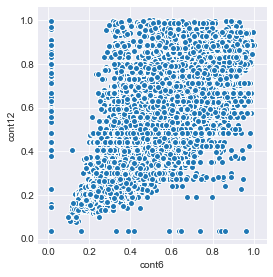

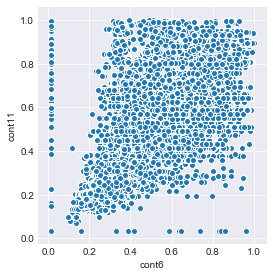

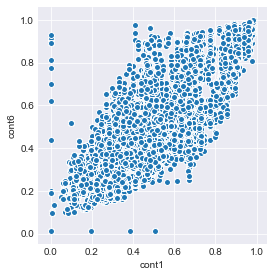

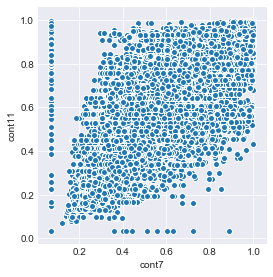

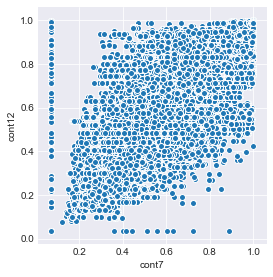

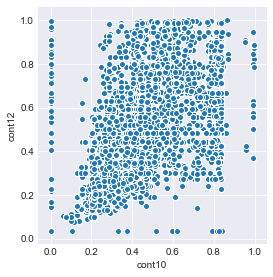

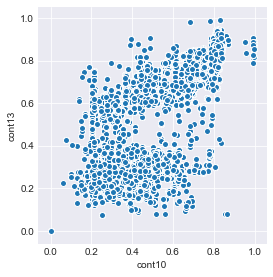

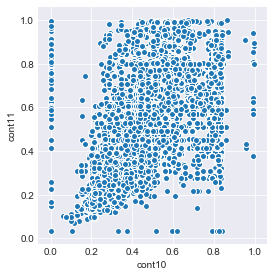

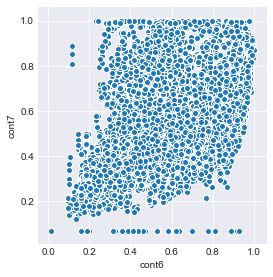

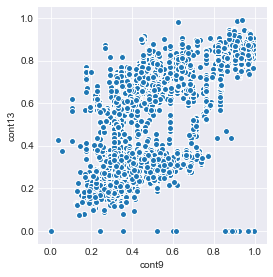

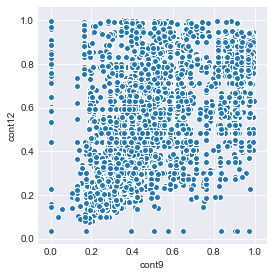

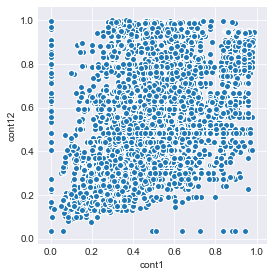

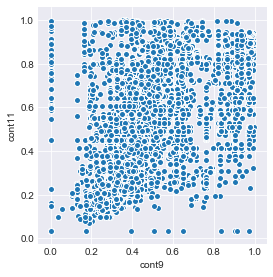

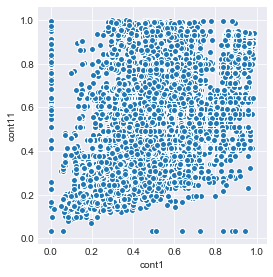

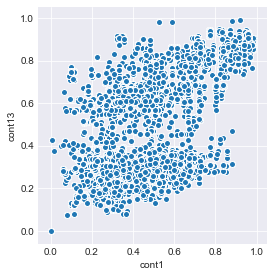

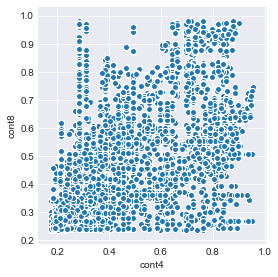

In [35]:
for v,i,j in s_corr_list:
    sns.pairplot(data_cont, x_vars=cols[i], y_vars=cols[j],size=4)
    plt.show()

In [37]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [45]:
cols=df_train.columns
train=df_train[cols[0]].unique()
test=df_test[cols[0]].unique()
labels=list(set(train)|set(test))
print(labels)
lb=LabelEncoder()
lb.fit(labels)
feature=lb.transform(df_train[cols[0]]).reshape(-1,1)
print(feature)
hot=OneHotEncoder(sparse=False)
hot.fit_transform(feature)

['B', 'A']
[[0]
 [0]
 [0]
 ..., 
 [0]
 [0]
 [1]]


array([[ 1.,  0.],
       [ 1.,  0.],
       [ 1.,  0.],
       ..., 
       [ 1.,  0.],
       [ 1.,  0.],
       [ 0.,  1.]])

In [48]:
a=np.array([[1,2,3],[3,4,5]])
b=np.array([[6,7],[8,9]])
np.column_stack((a,b))

array([[1, 2, 3, 6, 7],
       [3, 4, 5, 8, 9]])

In [51]:
np.hstack((a,b))

array([[1, 2, 3, 6, 7],
       [3, 4, 5, 8, 9]])

In [52]:
c=[]
c.append(a)
c.append(b)
np.hstack(c)

array([[1, 2, 3, 6, 7],
       [3, 4, 5, 8, 9]])

In [58]:
labels=[]
for i in range(116):
    train=df_train[cols[i]].unique()
    test=df_test[cols[i]].unique()
    labels.append(list(set(train)|set(test)))

cats=[]
for i in range(116):
    lb.fit(labels[i])
    features=lb.transform(df_train[cols[i]]).reshape(-1,1)
    features=hot.fit_transform(features)
    cats.append(features)
    
encoded_cats=np.hstack(cats)
print(encoded_cats.shape)


(188318, 1139)


NameError: name 'encoded_cat' is not defined

In [61]:
df_encoded=np.concatenate((encoded_cats, df_train.iloc[:,116:]),axis=1)
print(df_encoded.shape)

(188318, 1154)


In [62]:
del cats
del features
del encoded_cats
del df_train
del df_test